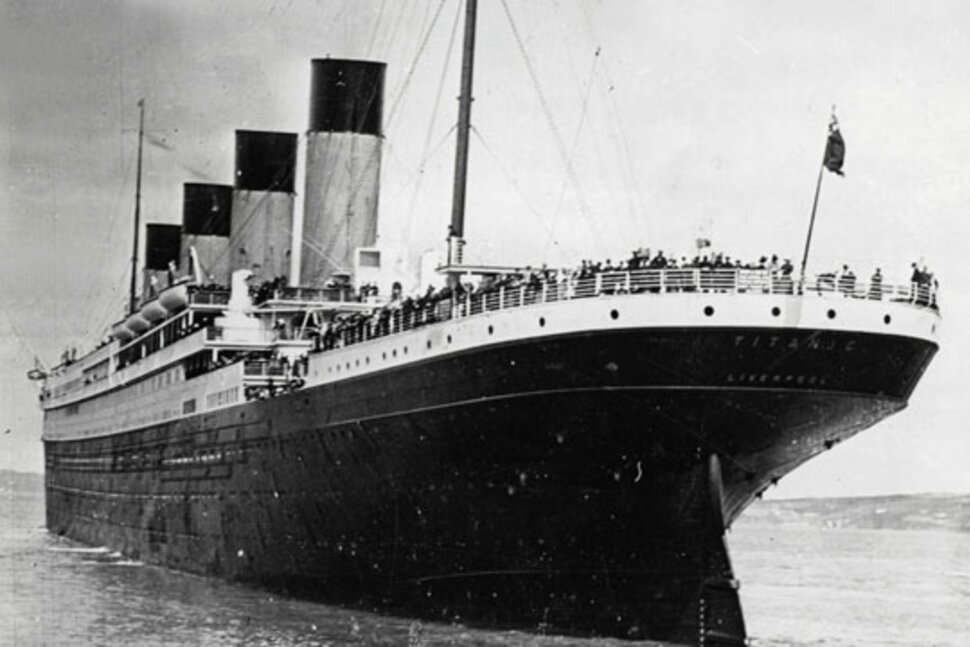

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [4]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Visulizing the Data**

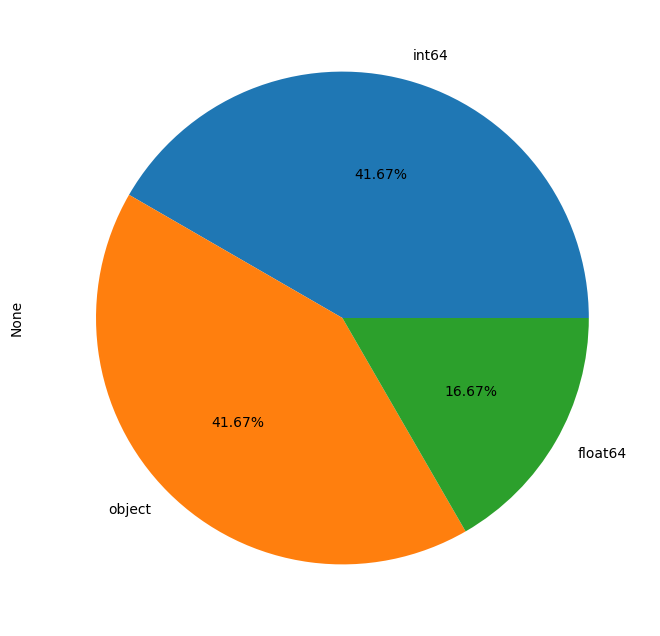

In [7]:
plt.figure(figsize=(8,8))
df.dtypes.value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

In [8]:
fig=px.line_polar(df,r='Pclass',theta='Embarked',color='Sex',
                   animation_group='Cabin',line_close=True,markers=True, direction='clockwise')
fig.show()

<AxesSubplot:xlabel='count', ylabel='Ticket'>

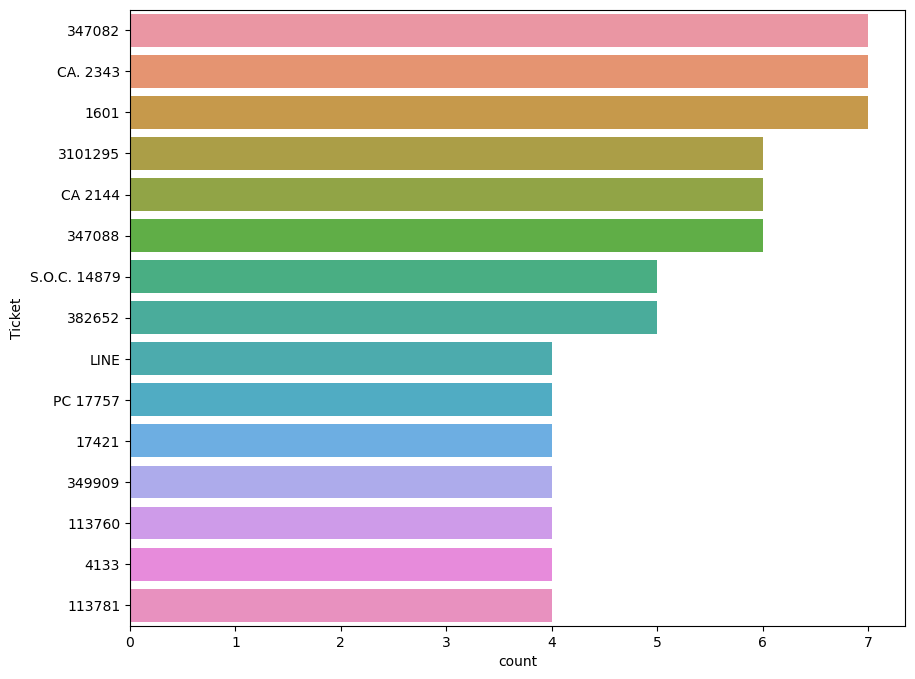

In [9]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y="Ticket", order=df['Ticket'].value_counts().index[0:15])

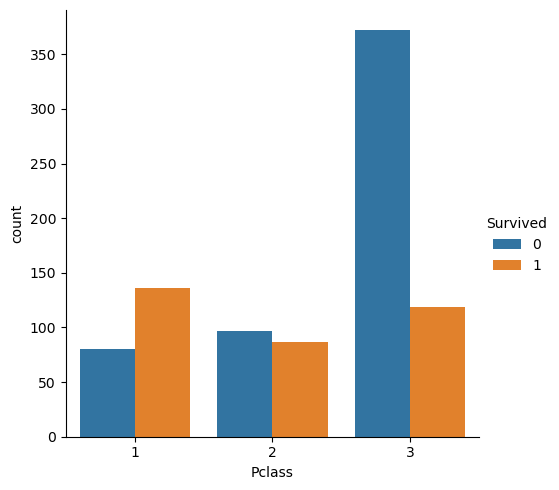

In [10]:
sns.catplot(x='Pclass',hue='Survived',kind='count',data=df)

<AxesSubplot:>

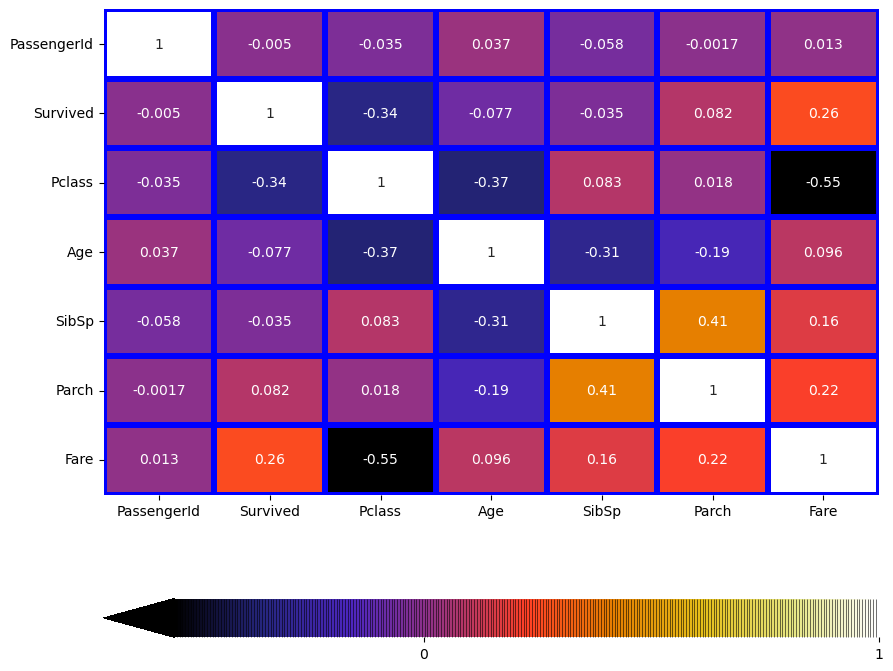

In [11]:
plt.figure(figsize=(10,9))
cbar_kws={
    'orientation':'horizontal',
    'shrink':1,
    'extend':'min',
    'extendfrac':0.1,
    'ticks':np.arange(0,22),
    'drawedges':True
}
sns.heatmap(df.corr(),cmap='CMRmap',annot=True,linewidth=4,linecolor='b',cbar_kws=cbar_kws)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

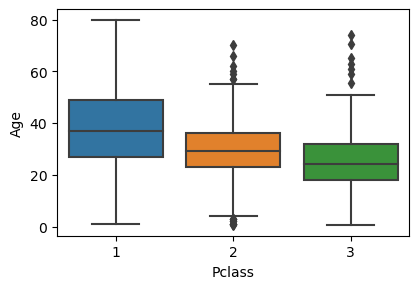

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,6)
sns.boxplot(x='Pclass',y='Age',data=df)

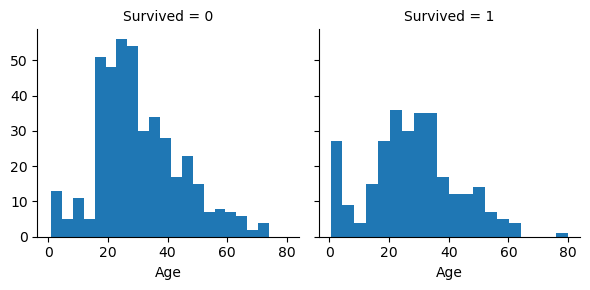

In [13]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [14]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
df.shape,test.shape

((891, 12), (418, 11))

In [16]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
data_cleaner=[df,test]

In [18]:
for dataset in data_cleaner:    
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
drop_column = ['PassengerId','Cabin', 'Ticket']
df.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column, axis=1, inplace = True)

print(df.isnull().sum())
print("-"*10)
print(test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [19]:
df=df.drop('Name',axis=1)
df.shape

(891, 8)

In [20]:
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [21]:
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['Embarked']=label.fit_transform(df['Embarked'])

In [22]:
x=df.drop('Embarked',axis=1)
x.shape

(891, 7)

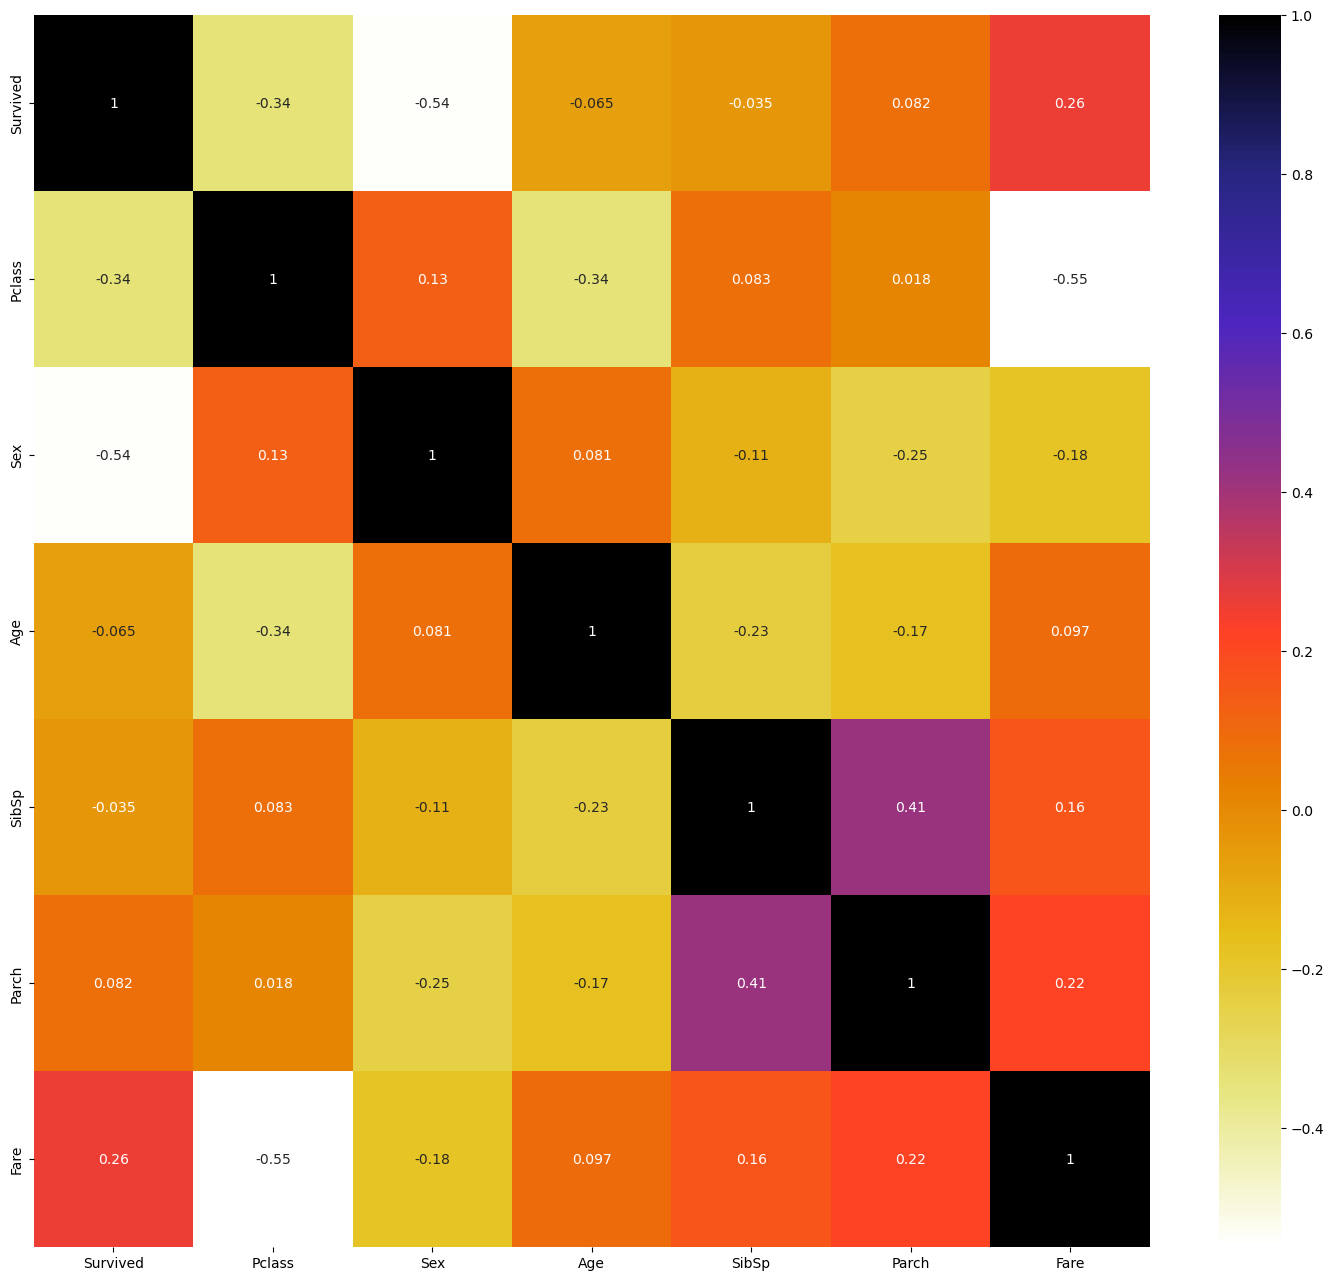

In [23]:
plt.figure(figsize=(18,16))
sns.heatmap(x.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [24]:
y=df['Embarked']


In [25]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=69)


In [27]:
xgb=XGBClassifier( 
    learning_rate=0.1,
    tree_method="hist",
    n_estimators=242,
    max_depth=7,
    max_leaves =99,
    subsample=1,
    colsample_bytree=1,
    max_bin=4096,
    n_jobs=-1)
xgb.fit(xtrain,ytrain)
xgb.score(xtest,ytest)

0.8917525773195877

In [28]:
xgb.predict(xtest)

array([1, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1,
       2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2,
       0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2,
       1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2,
       1, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2])

In [29]:
from sklearn import metrics
from sklearn.metrics import average_precision_score,accuracy_score,f1_score,classification_report,precision_recall_curve,confusion_matrix

In [30]:
def return_model(model,xtest,ytest):
    y_pred=model.predict(xtest)
    print(classification_report(ytest,y_pred))
    c_m=confusion_matrix(ytest,y_pred)

In [31]:
def c_m(model,xtest,ytest):
    y_pred=model.predict(xtest)
    c_m=confusion_matrix(ytest,y_pred)
    return c_m

In [32]:
return_model(xgb,xtest,ytest)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        59
           1       0.91      0.88      0.89        58
           2       0.90      0.90      0.90        77

    accuracy                           0.89       194
   macro avg       0.89      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194



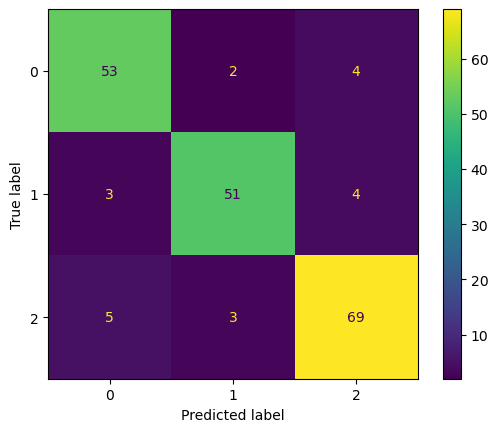

In [33]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_m(xgb,xtest,ytest))
cm_display.plot()
plt.show()

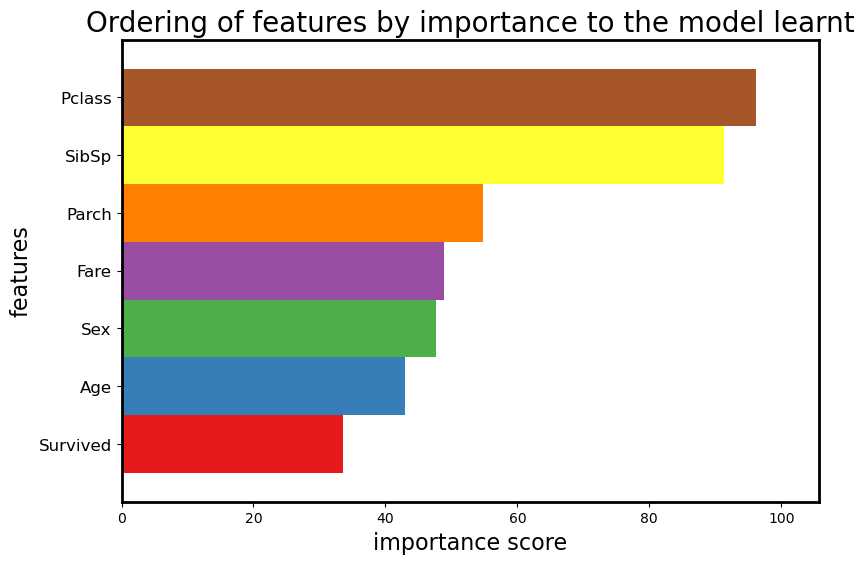

In [34]:
from xgboost import plot_importance
fig = plt.figure(figsize = (9, 6))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xgb, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(xtrain, ytrain)
gbk.score(xtest,ytest)

0.8814432989690721

In [36]:
import catboost as cat
cat_model = cat.CatBoostClassifier(
        iterations=400,
        max_depth=9,
    )
cat_model.fit(xtrain,ytrain)
cat_model.score(xtest,ytest)

Learning rate set to 0.176564
0:	learn: 0.9746751	total: 76.2ms	remaining: 30.4s
1:	learn: 0.8882407	total: 92.2ms	remaining: 18.4s
2:	learn: 0.8309320	total: 106ms	remaining: 14s
3:	learn: 0.7840547	total: 116ms	remaining: 11.4s
4:	learn: 0.7454289	total: 126ms	remaining: 9.99s
5:	learn: 0.7162746	total: 136ms	remaining: 8.93s
6:	learn: 0.6893038	total: 149ms	remaining: 8.36s
7:	learn: 0.6618108	total: 168ms	remaining: 8.22s
8:	learn: 0.6388020	total: 194ms	remaining: 8.41s
9:	learn: 0.6181652	total: 214ms	remaining: 8.33s
10:	learn: 0.6020872	total: 229ms	remaining: 8.1s
11:	learn: 0.5850381	total: 242ms	remaining: 7.81s
12:	learn: 0.5721398	total: 254ms	remaining: 7.56s
13:	learn: 0.5576999	total: 264ms	remaining: 7.28s
14:	learn: 0.5425325	total: 279ms	remaining: 7.16s
15:	learn: 0.5326503	total: 289ms	remaining: 6.94s
16:	learn: 0.5206953	total: 300ms	remaining: 6.76s
17:	learn: 0.5122258	total: 315ms	remaining: 6.69s
18:	learn: 0.5017572	total: 325ms	remaining: 6.51s
19:	learn: 0

0.8762886597938144

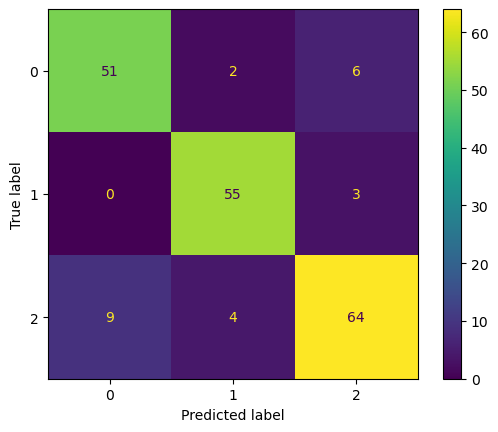

In [37]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_m(cat_model,xtest,ytest))
cm_display.plot()
plt.show()